<a href="https://colab.research.google.com/github/ADerudder/Matematica/blob/main/Integrales_de_superficie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrales sobre superficies




## Calculadora de integral de superficie

Integral de un campo vectorial F sobre una superficie S.


$$ \iint_{S} F . ds \ = \iint_{D} \ F(T (u,v)) \ . \ T_{u} \ x \ T_{v} \ du . dv $$

Donde T es una parametrizacion regular de la superficie.

*Observación:* Antes de cualquier cosa, correr la celda de abajo

In [ ]:
from sympy import init_session
init_session( use_latex = True)

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



La superficie que usted ingrese debe tener la formar.

$$ T(r,t)= \ ( \ S_{1}(r,t), \ S_{2}(r,t),\ S_{3}(r,t) \ ) $$

El campo F en el cual usted desea integrar la curva tiene la forma:

$$ \vec{F}=(F_{1}(x,y,z) \ , \ F_{2}(x,y,z) \ , \ F_{3}(x,y,z)) $$

In [ ]:
a,b,c,d,u,v,x,y,z,F,t,r= symbols("a,b,c,d,u,v,x,y,z,F,t,r")
rho=symbols("rho",positive='true')
#Ingrese su superficie 

S1=rho* cos(t)*sin(r)
S2=rho * sin(t)*sin(r)
S3= rho*cos(r)

#Campo

F1=x/((x**2 +y**2 +z**2)**(3/2))
F2=-y/((x**2 +y**2 +z**2)**(3/2))
F3=-z/((x**2 +y**2 +z**2)**(3/2))

#Limites de integracion para r
r1=0
r2=pi

#Limites de integracion para t
t1=0
t2=2* pi

Superficie=Matrix((S1,S2,S3))
F=Matrix((F1,F2,F3))


In [ ]:
#Codigo: 

#       Faltaria hacer el camino inverso, hay que hacerlo, pero tambien es cierto que se puede lograr invirtiendo  
# las variables , es decir, al momento de escribir la superficie poner a t en lugar de r y viceversa.

#Creamos los vectores Tt y Tu
#Tr
S1r=S1.diff(r)
S2r=S2.diff(r)
S3r=S3.diff(r)

Tr=Matrix((S1r,S2r,S3r)) #Vector Tr

#Tt
S1t=S1.diff(t)
S2t=S2.diff(t)
S3t=S3.diff(t)

Tt=Matrix((S1t,S2t,S3t)) #Vector Tt

Prod_vect=Tr.cross(Tt)

#Evaluamos al campo en la superficie

C=F1.subs(x,S1) #Vamos sustituyendo asi porque la funcion "subs" no acepta mas de 2 argumentos
C1=C.subs(y,S2)
C2=C1.subs(z,S3)

D=F2.subs(x,S1)
D1= D.subs(y,S2)
D2=D1.subs(z,S3)

E=F3.subs(x,S1)
E1=E.subs(y,S2)
E2=E1.subs(z,S3)


Campo_evaluado= Matrix((C2,D2,E2))  #campo evaluado en la superficie

P= Campo_evaluado.dot(Prod_vect) # Hacemos el producto "F(T(u,t)) . Tu x Tt"
PS=simplify(P)


In [ ]:
#Integramos de 2 maneras primero dr.dt y luego dt.dr
#Respecto a R


Prim0=PS.integrate(r) #Integramos con respecto a r
DEF0=integrate(PS,(r,r1,r2)) #Definida r
DEF0s=simplify(DEF0)

In [ ]:
Prim1 = DEF0s.integrate(t) #ntegramos respecto a t
DEF1=integrate(DEF0s,(t,t1,t2))# Definida t

#### Chequear si la superficie es correcta: 

$$ T(r,t)= \ ( \ S_{1}(r,t), \ S_{2}(r,t),\ S_{3}(r,t) \ ) = $$

In [ ]:
Superficie

⎡ρ⋅sin(r)⋅cos(t)⎤
⎢               ⎥
⎢ρ⋅sin(r)⋅sin(t)⎥
⎢               ⎥
⎣   ρ⋅cos(r)    ⎦

#### Chequear si su campo es correcto: 

$$ \vec{F}=(F_{1}(x,y,z) \ , \ F_{2}(x,y,z) \ , \ F_{3}(x,y,z)) = $$



In [ ]:
F

⎡                -1.5 ⎤
⎢  ⎛ 2    2    2⎞     ⎥
⎢x⋅⎝x  + y  + z ⎠     ⎥
⎢                     ⎥
⎢                 -1.5⎥
⎢   ⎛ 2    2    2⎞    ⎥
⎢-y⋅⎝x  + y  + z ⎠    ⎥
⎢                     ⎥
⎢                 -1.5⎥
⎢   ⎛ 2    2    2⎞    ⎥
⎣-z⋅⎝x  + y  + z ⎠    ⎦

Puede ir siguiendo las cuentas ya que la calculadora realiza paso por paso, o si prefiere, el resultado de la integral de superficie está al final del modulo.

$$ T_{r} = $$

In [ ]:
Tr

⎡ρ⋅cos(r)⋅cos(t)⎤
⎢               ⎥
⎢ρ⋅sin(t)⋅cos(r)⎥
⎢               ⎥
⎣   -ρ⋅sin(r)   ⎦

In [ ]:
oy=(sin(x))**3
integrate(oy,x)

$$ T_{t} = $$

In [ ]:
Tt

⎡-ρ⋅sin(r)⋅sin(t)⎤
⎢                ⎥
⎢ρ⋅sin(r)⋅cos(t) ⎥
⎢                ⎥
⎣       0        ⎦

$$ T_{r} \ x \ T_{t} =$$

In [ ]:
Prod_vect

⎡                  2    2                           ⎤
⎢                 ρ ⋅sin (r)⋅cos(t)                 ⎥
⎢                                                   ⎥
⎢                  2    2                           ⎥
⎢                 ρ ⋅sin (r)⋅sin(t)                 ⎥
⎢                                                   ⎥
⎢ 2           2              2                  2   ⎥
⎣ρ ⋅sin(r)⋅sin (t)⋅cos(r) + ρ ⋅sin(r)⋅cos(r)⋅cos (t)⎦

Tambien puede escribirse como:

In [ ]:
simplify(Prod_vect)

⎡ 2    2          ⎤
⎢ρ ⋅sin (r)⋅cos(t)⎥
⎢                 ⎥
⎢ 2    2          ⎥
⎢ρ ⋅sin (r)⋅sin(t)⎥
⎢                 ⎥
⎢    2            ⎥
⎢   ρ ⋅sin(2⋅r)   ⎥
⎢   ───────────   ⎥
⎣        2        ⎦

$$ F(T(r,t))= $$


In [ ]:
Campo_evaluado

⎡                                                        -1.5               ⎤
⎢  ⎛ 2    2       2       2    2       2       2    2   ⎞                   ⎥
⎢ρ⋅⎝ρ ⋅sin (r)⋅sin (t) + ρ ⋅sin (r)⋅cos (t) + ρ ⋅cos (r)⎠    ⋅sin(r)⋅cos(t) ⎥
⎢                                                                           ⎥
⎢                                                         -1.5              ⎥
⎢   ⎛ 2    2       2       2    2       2       2    2   ⎞                  ⎥
⎢-ρ⋅⎝ρ ⋅sin (r)⋅sin (t) + ρ ⋅sin (r)⋅cos (t) + ρ ⋅cos (r)⎠    ⋅sin(r)⋅sin(t)⎥
⎢                                                                           ⎥
⎢                                                            -1.5           ⎥
⎢      ⎛ 2    2       2       2    2       2       2    2   ⎞               ⎥
⎣   -ρ⋅⎝ρ ⋅sin (r)⋅sin (t) + ρ ⋅sin (r)⋅cos (t) + ρ ⋅cos (r)⎠    ⋅cos(r)    ⎦

Tambien puede escribirse como:

In [ ]:
simplify(Campo_evaluado)

⎡      -1.5               ⎤
⎢  ⎛ 2⎞                   ⎥
⎢ρ⋅⎝ρ ⎠    ⋅sin(r)⋅cos(t) ⎥
⎢                         ⎥
⎢       -1.5              ⎥
⎢   ⎛ 2⎞                  ⎥
⎢-ρ⋅⎝ρ ⎠    ⋅sin(r)⋅sin(t)⎥
⎢                         ⎥
⎢          -1.5           ⎥
⎢      ⎛ 2⎞               ⎥
⎣   -ρ⋅⎝ρ ⎠    ⋅cos(r)    ⎦

$$ F(\ T(r,t) \ ) \ .\ T_{r} \ x \ T_{t} = $$


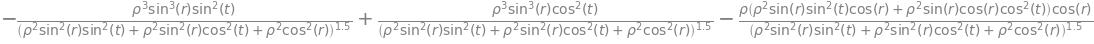

In [ ]:
P

Tambien puede escribirse como: 

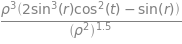

In [ ]:
simplify(P)

Ahora solamente queda integrar. Aqui el programa se divide en 2, por un lado se realiza: 

1. $$   \iint _{D} \ F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \ dr . dt $$

y se nos muestra cada integral por separada, por otro lado:

2. $$ \iint _{D} \ F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \ dt . dr $$

Es decir se cambia el orden en el que realizamos las integrales. Si bien el resultado final sera el mismo, nos permitira ver si existía un camino de integración mas sencillo o, por el contrario, eran los 2 similares.

Seguimos:

### Camino 1

Integramos primero respecto a r.

$$ \int  \ F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \ dr = $$


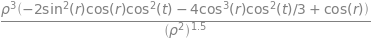

In [ ]:
Prim0

Tambien puede escribirse como :

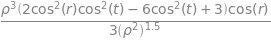

In [ ]:
simplify(Prim0)

Calculamos la integral definida con los limites de r.

$$   \Big( \int \ F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \  \Big) \  \Big | _{Dr} = $$

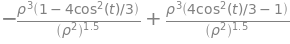

In [ ]:
DEF0

Tambien puede escribirse como: 

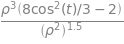

In [ ]:
simplify(DEF0)

Ahora integramos la expresion anterior con respecto a t

$$ \int _{Dt}  \ F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \ dt = $$


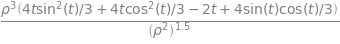

In [ ]:
Prim1

Tambien puede expresarse como:

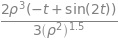

In [ ]:
simplify(Prim1)

Calculamos la integral definida con los limites de integracion de t

$$ \Big( \int \Big( \int   F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \ dr \Big) \ dt \Big) \ \Big | _{Dt}= $$

que es, finalmente igual a: 

$$ \iint_{S} F . ds \ = \iint_{D} \ F(T (r,t)) \ . \ T_{r} \ x \ T_{t} \ dr . dt =$$

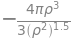

In [ ]:
DEF1

Tambien puede escribirse como: 

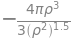

In [ ]:
simplify(DEF1)

$$ \approx $$

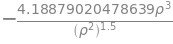

In [ ]:
N(DEF1)

##  Calculadora de superficie sobre funcion escalar

Integral de una funcion $f : R³  →  R $ sobre una superficie.

$$  \iint _{S} f(x,y,z) = \iint_{D} \ F(T (u,v)) \ . \Big| \Big| \ T_{u} \ x \ T_{v} \Big| \Big| \  du . dv $$ 

La superficie que usted ingrese debe tener la forma:

$$ T(r,t)= \ ( \ S_{1}(r,t), \ S_{2}(r,t),\ S_{3}(r,t) \ ) $$

La funcion que ustede ingrese debe tener la forma: 

$$ f:R³ → R \hspace{0.1cm}: \hspace{0.2cm} f(x,y,z) $$


### Observaciones: 

En general el programa correra bien hasta la parte de las integrales, a Sympy le cuesta un poco trabajar con los modulos y a veces le falta viveza criolla. El problema principal radica en la parte en que calcula la norma de " Tu x Tv" , donde no cancela nada y le queda una integral gigante. Si esto es una complicacion en el ejercicio , simplifique la norma que devuelve Sympy, a mano, y luego vuelvala a introducir en el codigo, en la parte indicada . Lo anterior ayudara a sympy a que pueda resolver la integral.

In [ ]:
#Ingrese su superficie  (t,r)
S1= cosh(r) *cos(t)
S2= cosh(r)*sin(t)
S3= r

#Ingrese su funcion (x,y,z)

f= x*y*abs(sinh(z))
S=Superficie=Matrix((S1,S2,S3))
#Limites
r1=-2
r2=2

t1=0
t2=pi/2

In [ ]:
f

In [ ]:
S

⎡cos(t)⋅cosh(r)⎤
⎢              ⎥
⎢sin(t)⋅cosh(r)⎥
⎢              ⎥
⎣      r       ⎦

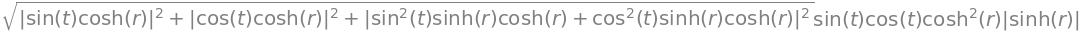

In [ ]:
#Codigo

#Creamos los vectores Tt y Tu
#Tr
S1r=S1.diff(r)
S2r=S2.diff(r)
S3r=S3.diff(r)

Tr=Matrix((S1r,S2r,S3r)) #Vector Tr

#Tt
S1t=S1.diff(t)
S2t=S2.diff(t)
S3t=S3.diff(t)

Tt=Matrix((S1t,S2t,S3t)) #Vector Tt

h=Prod_vect=Tr.cross(Tt) # Producto vectorial entre las derivadas


norm_alt= a # Si usted puede simplificar la norma, de una manera que la compu no, pongala y reemplace debajo en norma.
norma= h.norm()     # Norma que utiliza el programa para la integral 

#Evaluamos a la funcion en la superficie 

C=f.subs(x,S1) #Vamos sustituyendo asi porque la funcion "subs" no acepta mas de 2 argumentos
C1=C.subs(y,S2)
C2=C1.subs(z,S3)

f_eval= C2
producto= C2*norma

In [ ]:
#Respecto a r
Prim2=producto.integrate(r) #Integramos con respecto a r

In [ ]:
DEF2=integrate(producto,(r,r1,r2)) #Definida r

In [ ]:
#Respecto a t
Prim3 = simplify(DEF2).integrate(t) #ntegramos respecto a t

In [ ]:
DEF3=integrate(DEF2,(t,t1,t2))# Definida t

#### Chequear si la superficie es correcta: 

$$ T(r,t)= \ ( \ S_{1}(r,t), \ S_{2}(r,t),\ S_{3}(r,t) \ ) = $$

#### Chequear si su fucion es correcta: 

$$ f(x,y,z)= $$

In [ ]:
f

$$ T_{r} = $$

In [ ]:
Tr

⎡cos(t)⋅sinh(r)⎤
⎢              ⎥
⎢sin(t)⋅sinh(r)⎥
⎢              ⎥
⎣      1       ⎦

$$ T_{t} = $$

In [ ]:
Tt

⎡-sin(t)⋅cosh(r)⎤
⎢               ⎥
⎢cos(t)⋅cosh(r) ⎥
⎢               ⎥
⎣       0       ⎦

$$\ T_{r} \ x \ T_{t} =$$

In [ ]:
h

⎡                 -cos(t)⋅cosh(r)                 ⎤
⎢                                                 ⎥
⎢                 -sin(t)⋅cosh(r)                 ⎥
⎢                                                 ⎥
⎢   2                         2                   ⎥
⎣sin (t)⋅sinh(r)⋅cosh(r) + cos (t)⋅sinh(r)⋅cosh(r)⎦

Tambien puede expresarse como:

In [ ]:
simplify(h)

⎡-cos(t)⋅cosh(r)⎤
⎢               ⎥
⎢-sin(t)⋅cosh(r)⎥
⎢               ⎥
⎢   sinh(2⋅r)   ⎥
⎢   ─────────   ⎥
⎣       2       ⎦

$$\Big| \Big| \ T_{r} \ x \ T_{t} \Big| \Big| =  $$

In [ ]:
norma

Tambien puede expresarse como: 

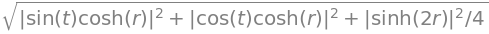

In [ ]:
(simplify(h)).norm()

$$ f(T(r,t))= $$

In [ ]:
f_eval

Tambien puede expresarse como:

In [ ]:
simplify(f_eval)

$$ f(T (r,t)) \ . \Big| \Big| \ T_{r} \ x \ T_{t} \Big| \Big| $$

In [ ]:
producto

Tambien puede expresarse como:

In [ ]:
simplify(producto)

$$ \ \int f(T (r,t)) \ . \Big| \Big| \ T_{r} \ x \ T_{t} \Big| \Big| \ dr $$

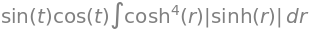

In [ ]:
Prim2

Tambien puede expresarse como:

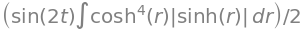

In [ ]:
simplify(Prim2)

$$ \Big( \int f(T (r,t)) \ . \Big| \Big| \ T_{r} \ x \ T_{t} \Big| \Big| \ \Big) \ \Big| _{Dr} =$$ 

In [ ]:
DEF2

2                                                      
⌠                                                      
⎮  ⎧                          4                        
⎮  ⎪sin(t)⋅cos(t)⋅sinh(r)⋅cosh (r)   for sinh(r) ≥ 0   
⎮  ⎨                                                 dr
⎮  ⎪                           4                       
⎮  ⎩-sin(t)⋅cos(t)⋅sinh(r)⋅cosh (r)     otherwise      
⌡                                                      
-2                                                     

Tambien puede expresarse como:

In [ ]:
simplify(DEF2)

2                                                  
⌠                                                  
⎮  ⎧                      4                        
⎮  ⎪ sin(2⋅t)⋅sinh(r)⋅cosh (r)                     
⎮  ⎪ ─────────────────────────   for sinh(r) ≥ 0   
⎮  ⎪             2                                 
⎮  ⎨                                             dr
⎮  ⎪                      4                        
⎮  ⎪-sin(2⋅t)⋅sinh(r)⋅cosh (r)                     
⎮  ⎪───────────────────────────     otherwise      
⎮  ⎩             2                                 
⌡                                                  
-2                                                 

$$ \Big( \int \Big( \int   F(T (r,t)) \ . \Big| \Big|  \ T_{r} \ x \ T_{t} \Big| \Big| \ dr \Big) \ dt \Big) = $$

In [ ]:
Prim3

Finalmente:

$$ \Big( \int \Big( \int   F(T (r,t)) \ . \Big| \Big| \ T_{r} \ x \ T_{t} \Big| \Big| \ dr \Big) \ dt \Big) \ \Big | _{Dt}= $$


que es igual a 

$$  \iint _{S} f(x,y,z) = \iint_{D} \ F(T (r,t)) \ . \Big| \Big| \ T_{r} \ x \ T_{t} \Big| \Big| \  dr . dt =$$ 

In [ ]:
DEF3